In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn


In [2]:
training_data = cmn.get_stringless_training_data()
testing_data = cmn.get_stringless_testing_data()
display(training_data.head(), testing_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


# Forest regression starts here 50:50

In [3]:
X_train = training_data.iloc[:,:-1]
y_train = training_data.iloc[:,-1:]
display(X_train.shape, X_train.head(), y_train.shape, y_train.head())

(1460, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


(1460, 1)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [4]:
X_test = testing_data
y_test = []
display(X_test.shape, X_test.head(), y_test)

(1459, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


[]

In [5]:
forest = RandomForestRegressor()
forest.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

# Random Forest Model Prediction for 50% of missing housing data

In [6]:
print("model score on training data:", forest.score(X_train, y_train))
y_predicted = forest.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.979635411988579


array([127277.08, 159080.25, 183826.52, ..., 154735.87, 110657.51,
       236768.3 ])

# Reverse Forest 50:50 split to verify that the prediction is correct

should we add an averaging model to this as there is some variance as high as 2% when rerunning the randomforest model

In [7]:
forest = RandomForestRegressor()
forest.fit(X_test, y_predicted)

RandomForestRegressor()

In [8]:
print("model score on training data:", forest.score(X_test, y_predicted))
print("model score on test data:", forest.score(X_train, y_train))

model score on training data: 0.996981043526854
model score on test data: 0.8576573058571146


In [9]:
testing_data = cmn.merge_predicted_price(data=testing_data, prediction=y_predicted)
testing_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,127277.08
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,159080.25
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,183826.52
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,360,36,0,0,0,0,0,6,2010,181367.67
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,82,0,0,144,0,0,1,2010,195955.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,84890.50
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,24,0,0,0,0,0,4,2006,85762.50
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,474,0,0,0,0,0,0,9,2006,154735.87
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,110657.51


In [10]:
sns.set_context("paper")
sns.set_style("ticks")

# Matrix

(8, 8)


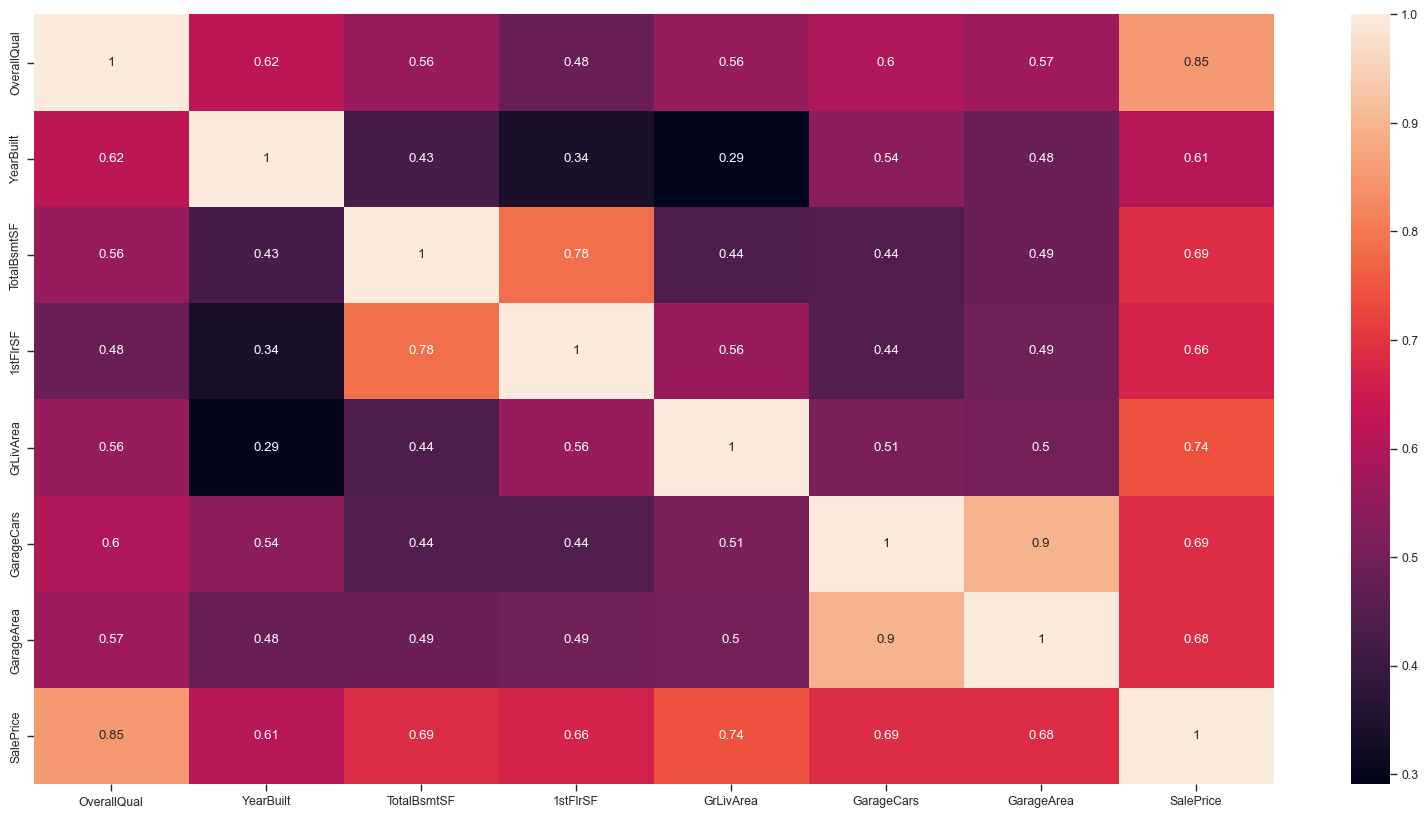

In [11]:
matrix = cmn.plot_matrix(data=testing_data, threshold=0.6)

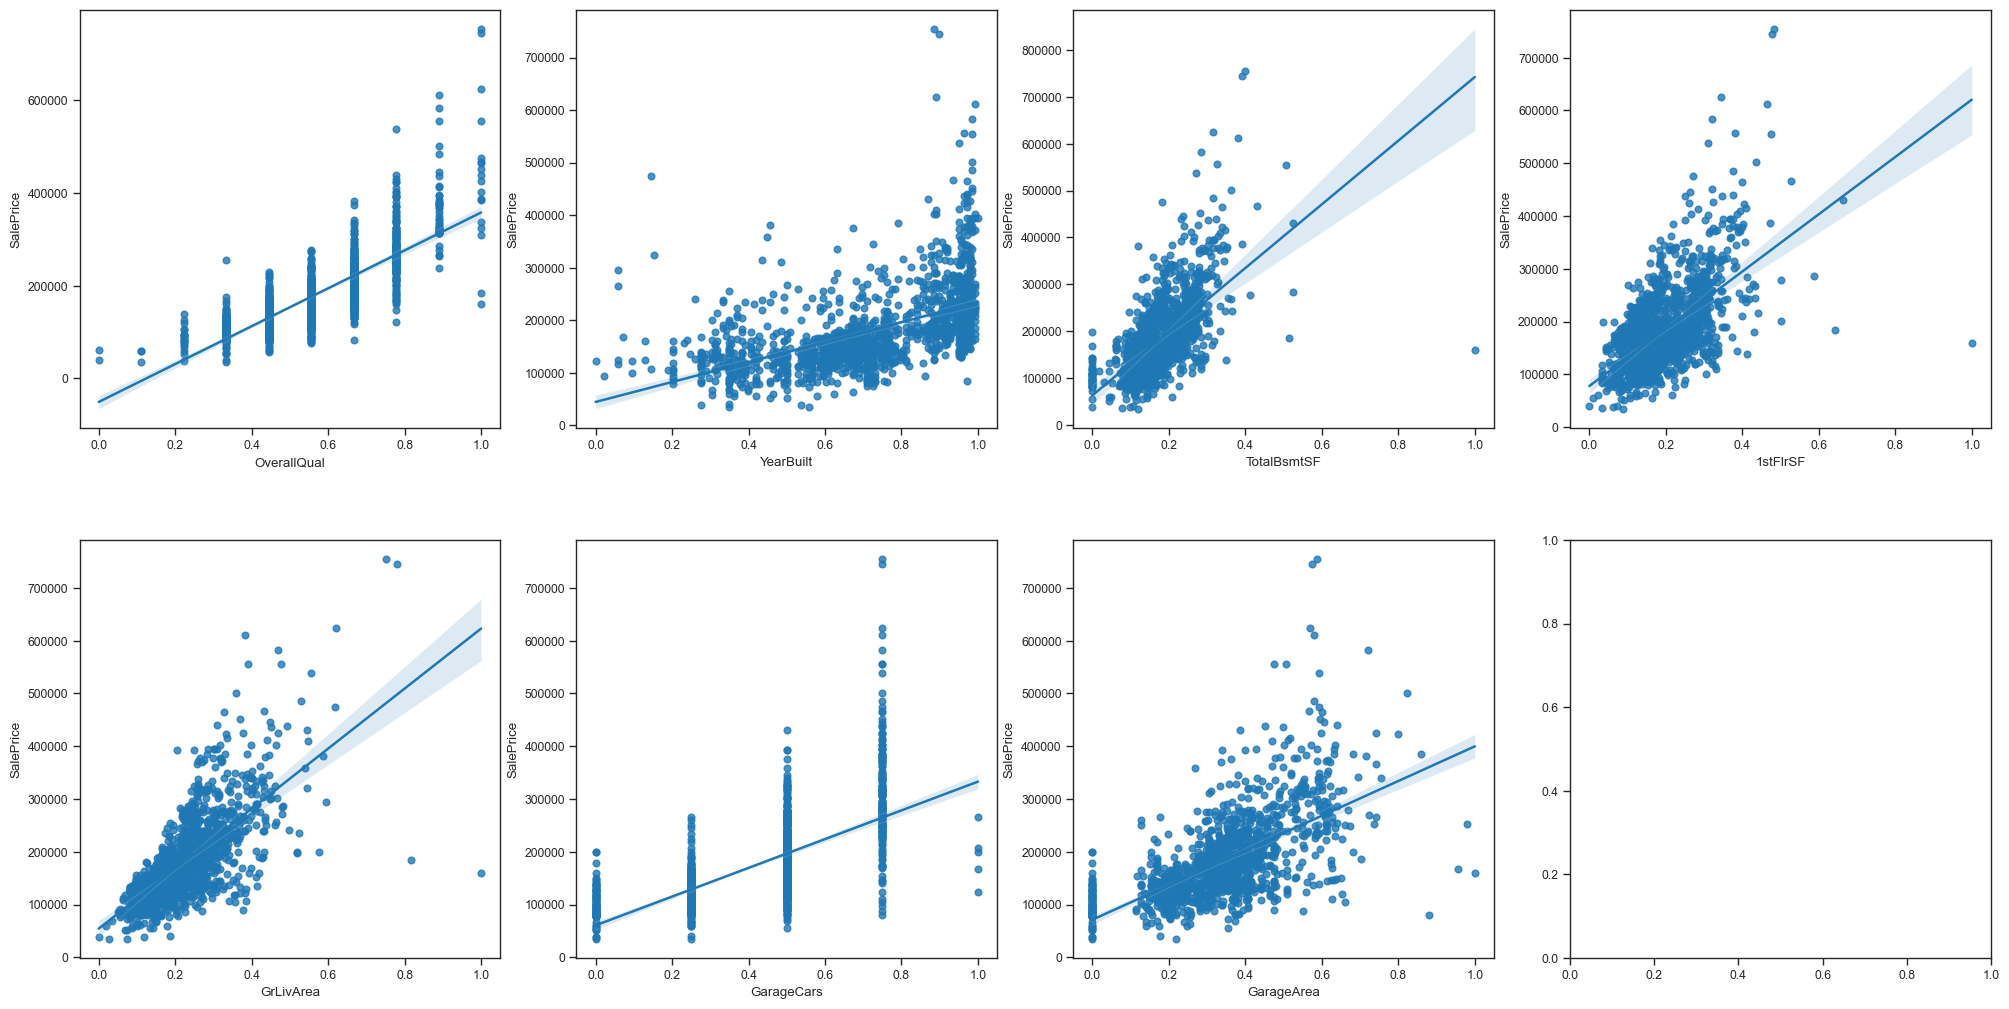

In [12]:
matrix = matrix.reset_index()
selected_columns = (matrix['index'].tolist())[:-1]
cmn.plot_multi_scatter(columns=selected_columns, y_feature_name='SalePrice', data=training_data)